<a href="https://colab.research.google.com/github/miltong98/Tiger/blob/main/Blood_pressure_multiple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy
import sklearn

In [ ]:
df = pd.read_csv('bp_data.csv')

In [ ]:
df

In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      11 non-null     int64
 1   X2      11 non-null     int64
 2   X3      11 non-null     int64
dtypes: int64(3)
memory usage: 392.0 bytes


In [ ]:
df.columns = ['BP', 'Age', 'Weight']

x_1 = df['BP'].values
x_2 = df['Age'].values
x_3 = df['Weight'].values

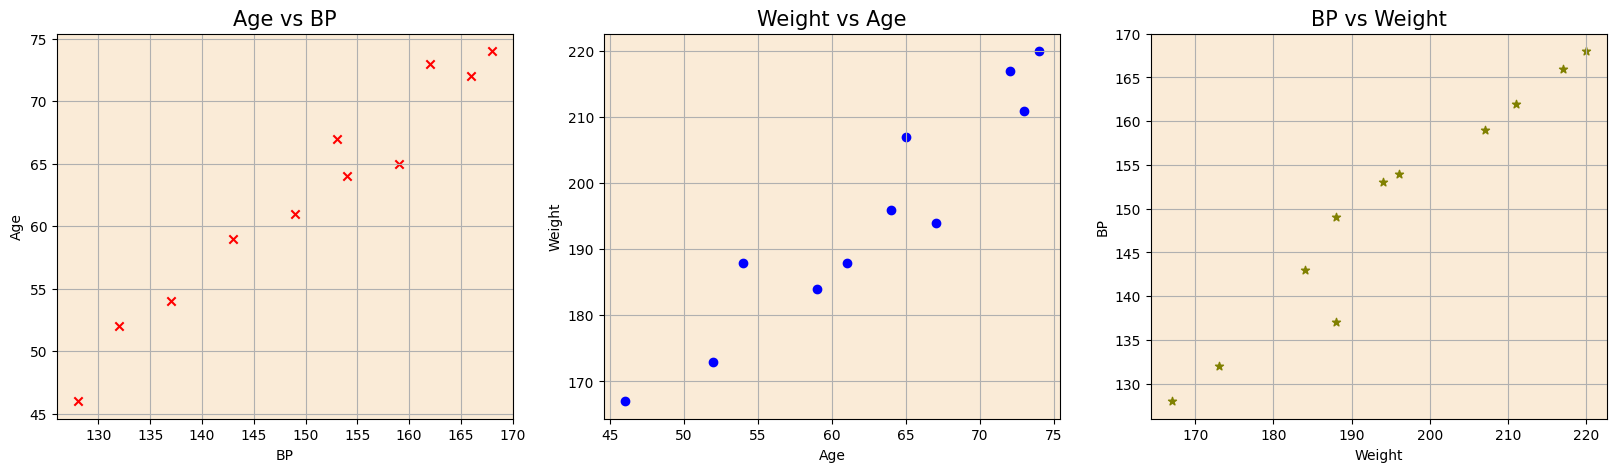

In [ ]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=3)

ax[0].scatter(x_1,x_2, marker='x', color='red')
ax[0].set_title('Age vs BP', fontdict={'fontsize':15})
ax[0].set_xlabel('BP')
ax[0].set_ylabel('Age')
ax[0].grid(True)
ax[0].set_facecolor('#FAEBD7')

ax[1].scatter(x_2,x_3, marker='o', color='blue')
ax[1].set_title('Weight vs Age', fontdict={'fontsize':15})
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Weight')
ax[1].grid(True)
ax[1].set_facecolor('#FAEBD7')

ax[2].scatter(x_3,x_1, marker='*', color='olive')
ax[2].set_title('BP vs Weight', fontdict={'fontsize':15})
ax[2].set_xlabel('Weight')
ax[2].set_ylabel('BP')
ax[2].grid(True)
ax[2].set_facecolor('#FAEBD7')

fig.show()

In [ ]:
arr= df.to_numpy()

x_train = arr[:,1:]  # Age and Weight
y_train = arr[:,0]   # BP

m,n = x_train.shape
print(m,n)

11 2


In [ ]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        f_wb = np.dot(X[i],w) + b
        cost+= (f_wb - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost

In [ ]:
def compute_gradient(X,y,w,b):
    m, n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j]+= err * X[i,j]
        dj_db+= err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [ ]:
def gradient_descent(X,y,w_in,b_in, compute_cost, compute_gradient, alpha, num_iters):
    J_hist = []

    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(X,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            J_hist.append(compute_cost(X,y,w,b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}   ")

    return w, b, J_hist

In [ ]:
w_ini = np.zeros(x_train.shape[1])
b_ini = 0

iterations = 10000
alpha = 1.0e-7

w_final, b_final, J_history = gradient_descent(x_train, y_train, w_ini, b_ini,
                                               compute_cost, compute_gradient,
                                               alpha, iterations)

print(f"w, b found by gradient descent: {w_final}, {b_final:0.4f}")

m = x_train.shape[0]

for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.4f}, target value: {y_train[i]}")

Iteration    0: Cost 11252.37   
Iteration 1000: Cost     6.20   
Iteration 2000: Cost     3.84   
Iteration 3000: Cost     3.84   
Iteration 4000: Cost     3.84   
Iteration 5000: Cost     3.84   
Iteration 6000: Cost     3.84   
Iteration 7000: Cost     3.84   
Iteration 8000: Cost     3.84   
Iteration 9000: Cost     3.84   
w, b found by gradient descent: [0.22693522 0.69668856], 0.0036
prediction: 132.3314, target value: 132
prediction: 141.5835, target value: 143
prediction: 150.3659, target value: 153
prediction: 163.5712, target value: 162
prediction: 151.0784, target value: 154
prediction: 170.0683, target value: 168
prediction: 143.2356, target value: 137
prediction: 144.8241, target value: 149
prediction: 158.9689, target value: 159
prediction: 126.7896, target value: 128
prediction: 167.5244, target value: 166


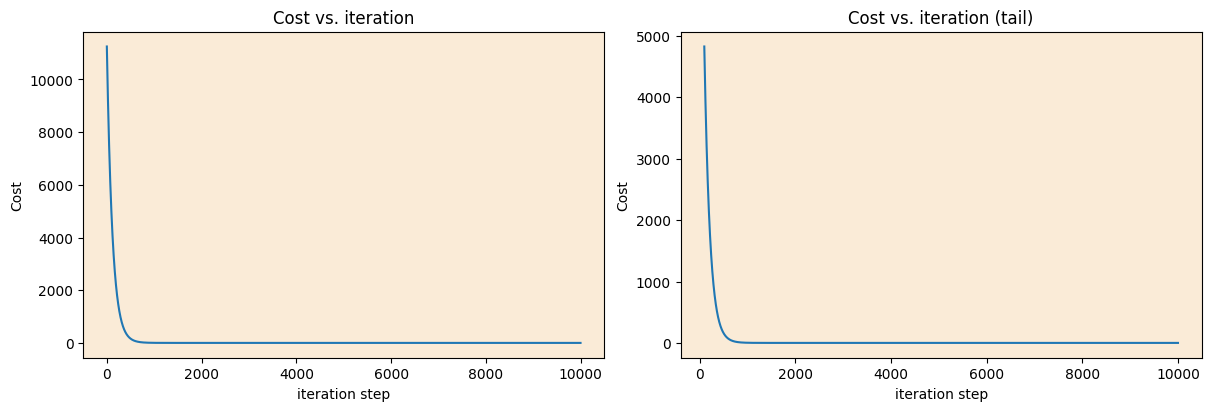

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
ax1.set_facecolor('#FAEBD7')
ax2.set_facecolor('#FAEBD7')
plt.show()